In [48]:
import cv2
import numpy as np

# İki resmi yükle
img1 = cv2.imread('img1.png')
img2 = cv2.imread('img2.png')


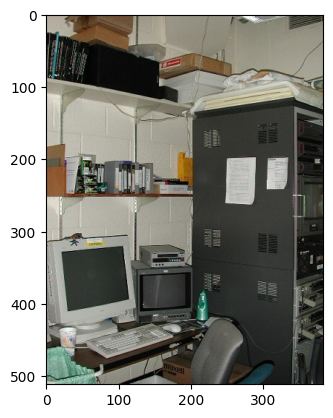

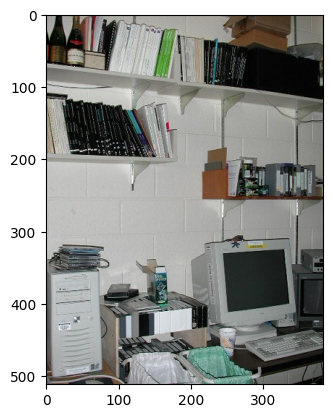

In [49]:
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

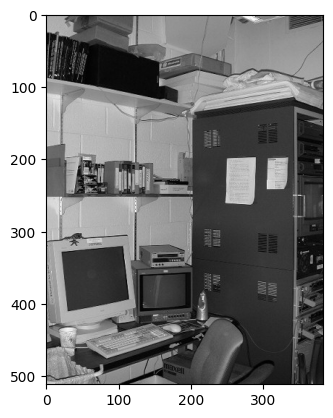

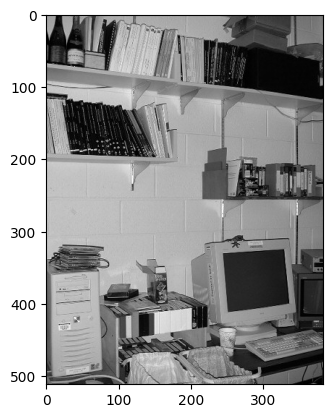

In [50]:
# Resimleri gri tonlama dönüşümü ile dönüştür
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray1, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(gray2, cv2.COLOR_BGR2RGB))
plt.show()

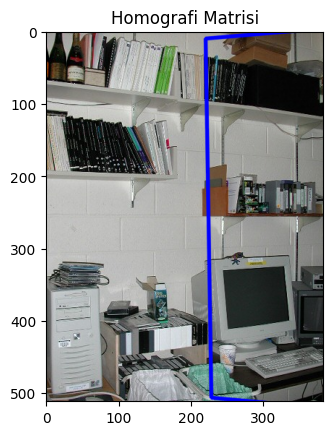

In [51]:

# SIFT özellik çıkarıcıyı ve eşleştiriciyi oluştur
sift = cv2.SIFT_create()
matcher = cv2.BFMatcher()

# Özellikleri bulun ve eşleştir
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)
matches = matcher.knnMatch(des1, des2, k=2)

# İyi eşleşmeleri seç
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Homografi matrisini hesapla
src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Homografi matrisinin gösterimi
h, w = gray1.shape
pts = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2)
dst = cv2.perspectiveTransform(pts, M)
img2 = cv2.polylines(img2, [np.int32(dst)], True, 255, 3, cv2.LINE_AA)
fig, ax = plt.subplots()
ax.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax.set_title('Homografi Matrisi')
plt.show()




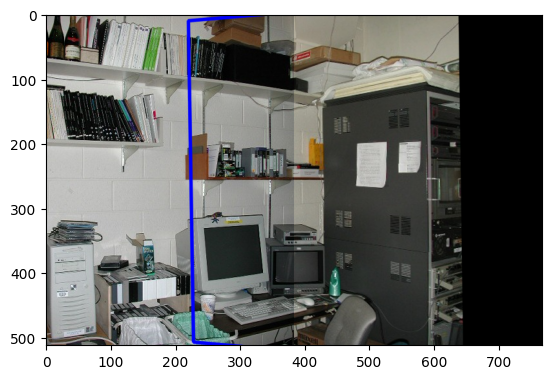

In [52]:
# İki resmi birleştir
result = cv2.warpPerspective(img1, M, (img1.shape[1] + img2.shape[1], img1.shape[0]))
result[0:img2.shape[0], 0:img2.shape[1]] = img2

# Birleştirilmiş resmin gösterimi
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

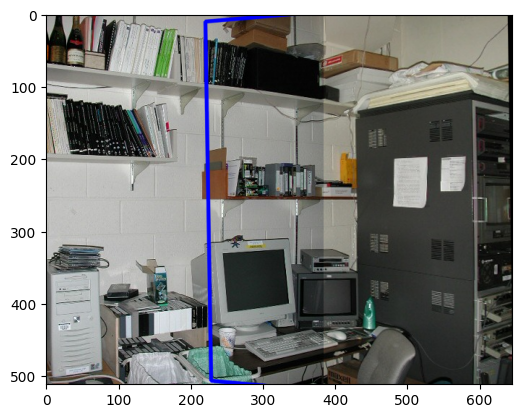

In [53]:
# Dörtgen bir kutuya sığdır
gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
largest_contour = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(largest_contour)
result = result[y:y+h, x:x+w]

# Dörtgenle sınırlı resmin gösterimi
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()